In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

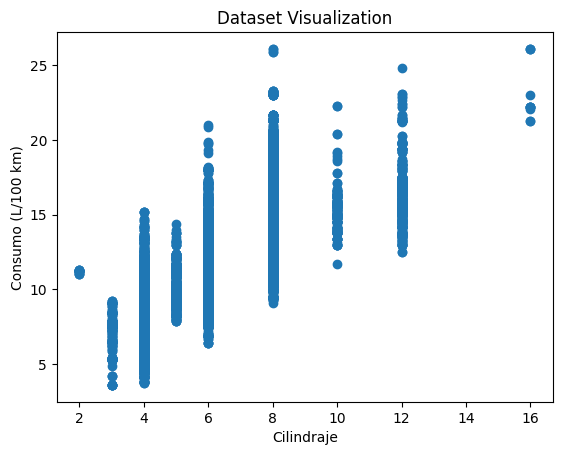

In [ ]:
data = pd.read_csv('consumo_gasolina.csv')
X = data[['CYLINDERS']].values 
Y = data['COMB (L/100 km)'].values  

plt.scatter(X, Y)
plt.xlabel('Cilindraje')
plt.ylabel('Consumo (L/100 km)')
plt.title('Dataset Visualization')
plt.show()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape 


((15789, 1), (6767, 1))

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R^2 Score: 0.5906
Mean Squared Error (MSE): 3.3827
Mean Absolute Error (MAE): 1.3740


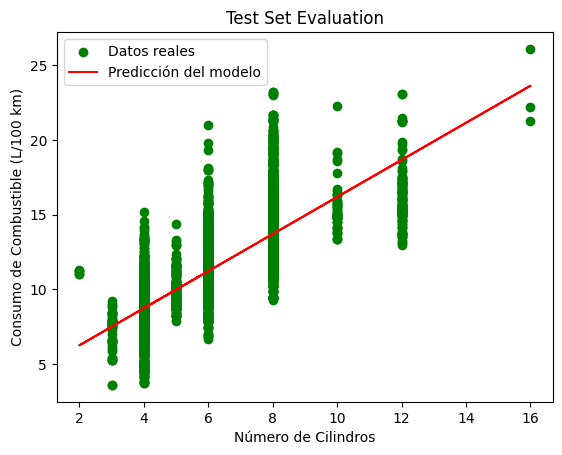

In [ ]:
Y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)


plt.scatter(X_test, Y_test, color='green', label='Datos reales')
plt.plot(X_test, Y_pred_test, color='red', label='Predicción del modelo')
plt.title('Test Set Evaluation')
plt.xlabel('Número de Cilindros')
plt.ylabel('Consumo de Combustible (L/100 km)')
plt.legend()
plt.show()


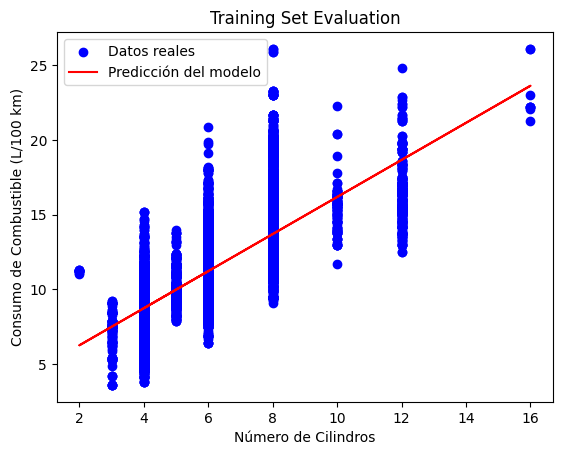

In [ ]:
Y_pred_train = model.predict(X_train)

plt.scatter(X_train, Y_train, color='blue', label='Datos reales')
plt.plot(X_train, Y_pred_train, color='red', label='Predicción del modelo')
plt.title('Training Set Evaluation')
plt.xlabel('Número de Cilindros')
plt.ylabel('Consumo de Combustible (L/100 km)')
plt.legend()
plt.show()



Epoch 1: MSE = 130.2776, MAE = 11.0324
Epoch 2: MSE = 11.2447, MAE = 2.8667
Epoch 3: MSE = 4.8811, MAE = 1.6876
Epoch 4: MSE = 4.5376, MAE = 1.6152
Epoch 5: MSE = 4.5157, MAE = 1.6104
Epoch 6: MSE = 4.5111, MAE = 1.6095
Epoch 7: MSE = 4.5074, MAE = 1.6087
Epoch 8: MSE = 4.5037, MAE = 1.6080
Epoch 9: MSE = 4.5001, MAE = 1.6073
Epoch 10: MSE = 4.4964, MAE = 1.6066


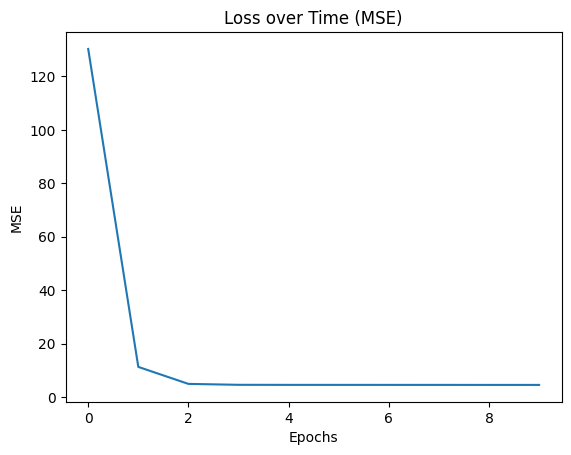

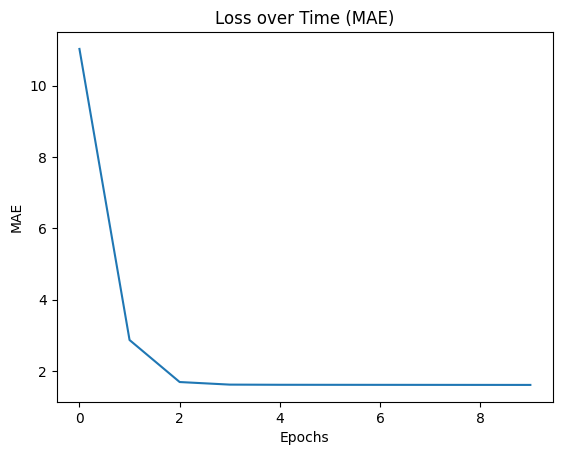

Final Parameters: Coeficiente (w) = 1.7776, Intercepto (b) = 0.3390


In [55]:
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 10
mse_history = []
mae_history = []

for epoch in range(epochs):
    Y_pred = X_train_flattened * w + b 
    residuals = Y_train - Y_pred
    mse = np.mean(residuals ** 2)
    mae = np.mean(np.abs(residuals))
    mse_history.append(mse)
    mae_history.append(mae)
    w_gradient = -2 * np.dot(X_train_flattened, residuals) / len(X_train_flattened)
    b_gradient = -2 * np.sum(residuals) / len(X_train_flattened)
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient
    print(f"Epoch {epoch+1}: MSE = {mse:.4f}, MAE = {mae:.4f}")

plt.plot(mse_history)
plt.title('Loss over Time (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(mae_history)
plt.title('Loss over Time (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

print(f"Final Parameters: Coeficiente (w) = {w:.4f}, Intercepto (b) = {b:.4f}")


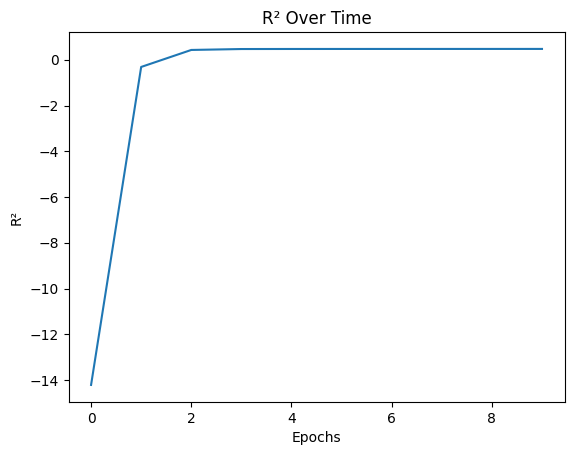

In [56]:
if X_train.ndim > 1:
    X_train = X_train.ravel() 


w = 0.0  
b = 0.0
learning_rate = 0.01
epochs = 10
r2_history = []

for epoch in range(epochs):
    Y_pred = X_train * w + b
    r2 = r2_score(Y_train, Y_pred)
    r2_history.append(r2)
    residuals = Y_train - Y_pred
    w_gradient = -2 * np.dot(X_train, residuals) / len(X_train)
    b_gradient = -2 * np.sum(residuals) / len(X_train)
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient


plt.plot(r2_history)
plt.title('R² Over Time')
plt.xlabel('Epochs')
plt.ylabel('R²')
plt.show()

In [ ]:
print("Coeficiente (Pendiente): {:.4f}".format(model.coef_[0]))
print("Intercepto (b): {:.4f}".format(model.intercept_))  


average_consumption = data['COMB (L/100 km)'].mean()
print("Promedio del consumo de combustible: {:.4f}".format(average_consumption))



Coeficiente (Pendiente): 1.2410
Intercepto (b): 3.7741
Promedio del consumo de combustible: 11.0343
